In [1]:
from scipy.stats import maxwell
import numpy as np
import matplotlib.pyplot as plt

---

# Learning goal: 

* To learn how the different features in the SA spectrum relate to the energy level diagram
* To learn what effects cause the different aspects of the SA spectrum lineshape

---

# Doppler-broadened lineshape in rubidium

The FWHM of the Doppler-broadened absorption line is given by:

$$\Delta \nu = 2 \nu_0 \left( 2 \ln \left( 2kT/mc^2 \right)\right)^{1/2}$$

where $$\nu_0$$ is the transition frequency.  For the Rb D lines at room temperature this works out to about 500 MHz.

Distribution of velocities in 1D is given by:

$$f(v_x) = \sqrt{\frac{m}{2 \pi k_B T}} e^{\left( \frac{-mv_x^2}{2 k_B T}\right)}$$

The distribution of *speeds* in 3D is Maxwell's distribution:

$$f(v) = 4 \pi v^2 \left( \frac{m}{2 \pi k_B T}\right) ^{3/2} e^{\left( \frac{-mv^2}{2 k_B T} \right)}$$


The Doppler shift is:

$$f^` = f_0 \left( \frac{1+\frac{v_r}{c}}{1+\frac{v_s}{c}} \right)$$

where $v_r$ is the speed of the receiver and $v_s$ is the source speed.




For the velocity distribution, $\sigma = \sqrt{\frac{k_BT}{m}}$ and $\mu = 0$



---

## Natural Linewidth

The lifetime for the $3P_{3/2}$ states is approximately $\tau \approx 28$ ns, which means Heisenbergs uncertainty gives us $\Delta E \Delta t \ge \hbar$ or $\Delta E \ge \hbar/\Delta t$.  With $\Delta t = \tau$ and assuming minimum uncertainty we get $\Delta E = \hbar/\tau$.

We'll assume a Lorentzian lineshape where the FWHM is $\Delta f = \Delta \frac{E/\hbar}{2 \pi} = \frac{1/\tau}{2 \pi} = \frac{1}{2 \pi \tau} \approx 6$ MHz.

The Lorentzian lineshape is:

$$P(f) = \frac{1}{1+4(f - f_0)^2/\Delta f^2}$$

The transition rate is $\alpha_0 P(f) I$ where we take $\alpha_0 \approx 2\times10^6\ m^2/J$.

On a side note, the saturation intensity $I_{sat} = \frac{2 \pi \Delta f}{\alpha_0} \approx 1.6\ mW/cm^2$ for our rubidium transition indicates the intensity where we have an equal likelihood for stimulated absorption or emission (i.e. equal excited state and ground state populations).  The number $I_{sat}$ is a useful yardstick for measuring intensities in this situation because it is the *relative* size of the intensity to this number that determines the intensity-dependent behavior.  If $I \ll I_{sat}$ then we have a very low laser intensity, which is the assumption we are operating under for the moment.

NB: Some books use $\gamma$ for the natural linewidth instead of $\Delta f$.

Note, the maximum of the Lorentizian distribuiton (at $f=f_0$) should be $P(f_0) = frac{2}{\pi \Gamma}$ so I think I need to multiply the function above by this factor to normalize it.  On second thought, if I want a 100% probability when. on resonance I should be able to use this as is.

So the assumption is that on resonance the probability is directly proportional to the Lorentzian distribution above - this ignores 

---

For the moment assume all atoms are in the ground state.  This means we are ignoring the thermal distribution of atoms between excited state and ground state and treating the laser intensisty as well below the saturation intensity.

---
# $^{85}Rb$
These values are for ${85}Rb$:
* Hyperfine splitting between F=2 and F=3 of $5S_{1/2}$ level is 3036 MHz
* The splitting between $5S_{1/2}$ and $5P_{3/2}$ is $3.846\times10^{14}$ Hz $ = 384.6E6$ MHz
* Hyperfine splitting between F=0 and F=1 of $5P_{3/2}$ level is 29 MHz
* Hyperfine splitting between F=1 and F=2 of $5P_{3/2}$ level is 63 MHz
* Hyperfine splitting between F=2 and F=3 of $5P_{3/2}$ level is 121 MHz


## Absorption probability

What is the probability that an atom will absorb a photon from the laser?  Plot the absorption probability across the range $f_1 \pm 25 \Delta f$

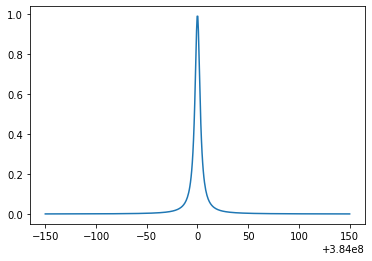

In [2]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 0 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam

prob_of_absorption = np.zeros(num_steps)
v_x = np.random.normal(mu, sigma)


for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption[i] = lorentz(f_las, f_1, v_x)

plt.plot(freq_sweep,prob_of_absorption)
plt.show()

What happens to the absorption probability as you increase the temperature?  Try 10 K (which is still pretty cold) and run the simulation many times to see what happens to the absorption curve.

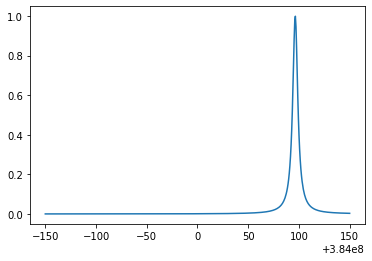

In [3]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 100 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam

prob_of_absorption = np.zeros(num_steps)
v_x = np.random.normal(mu, sigma)


for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption[i] = lorentz(f_las, f_1, v_x)

plt.plot(freq_sweep,prob_of_absorption)
plt.show()

Set up a random generator to sweep through the frequencies and randomly determine whether a photon is absorbed.  Plot the frequencies where a photon is absorbed and print out the frequencies where absorption occurs.

Where do you see the most absorptions occuring?  Why does this make sense?

Photon absorbed at f= 383999905.91182363
Photon absorbed at f= 383999922.74549097
Photon absorbed at f= 383999954.6092184
Photon absorbed at f= 383999984.0681363
Photon absorbed at f= 383999995.49098194
Photon absorbed at f= 383999996.6933868
Photon absorbed at f= 383999997.8957916
Photon absorbed at f= 383999998.49699396
Photon absorbed at f= 383999999.0981964
Photon absorbed at f= 383999999.6993988
Photon absorbed at f= 384000000.3006012
Photon absorbed at f= 384000000.9018036
Photon absorbed at f= 384000002.1042084
Photon absorbed at f= 384000002.70541084
Photon absorbed at f= 384000003.3066132
Photon absorbed at f= 384000005.11022043
Photon absorbed at f= 384000006.3126252
Photon absorbed at f= 384000009.31863725


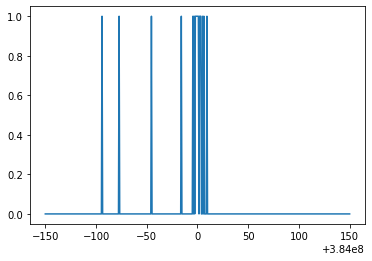

In [4]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 0 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam

photons_absorbed = np.zeros(num_steps)
v_x = np.random.normal(mu, sigma)

for i in range(num_steps):
    f_las = freq_sweep[i]
    prob_of_absorption = lorentz(f_las, f_1, v_x)
    if np.random.rand() < prob_of_absorption:
        photons_absorbed[i] += 1
        energy_state = 1
        print("Photon absorbed at f=", f_las)

plt.plot(freq_sweep,photons_absorbed)
plt.show()


Try running your simulation for N = 10 atoms.  Turn off the print-out of the frequencies and just plot the total number of photons absorbed.  **NB: 10 is pretty noisy and maybe not useful.  Consider cutting**.

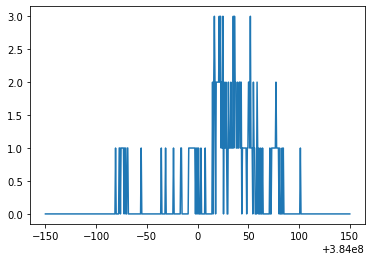

In [5]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 10 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 10 #number of atoms

photons_absorbed = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption = lorentz(f_las, f_1, v_x)
        if np.random.rand() < prob_of_absorption:
            photons_absorbed[i] += 1
            energy_state = 1

plt.plot(freq_sweep,photons_absorbed)
plt.show()


Repeat for N=100 atoms.  What do you notice?  For comparison, plot the probability of absorption for a $v=0$ atom (multiply it by the maximum value of the number of absorbed photons to scale it up).

Try running this cell several times and explain how the curve changes.  Why do you think it changes each time you run the simulation?

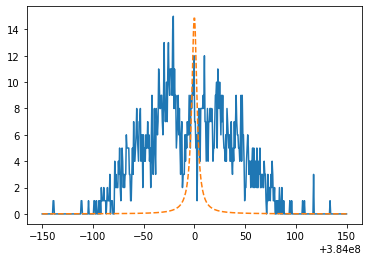

In [6]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 10 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 100 #number of atoms

photons_absorbed = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption = lorentz(f_las, f_1, v_x)
        if np.random.rand() < prob_of_absorption:
            photons_absorbed[i] += 1
            energy_state = 1

theory = lorentz(freq_sweep, resonance_freq,0)*np.max(photons_absorbed)
plt.plot(freq_sweep,photons_absorbed)
plt.plot(freq_sweep, theory, '--')
plt.show()


Increase the number of atoms to `N=1000` and then `N=10000`. Stepping up this way helps debug things and prevents you from running into a situation where you can't tell if something is broken or it is just taking a really long time to calculate. 

How does the spectrum of absorbed photons compare to the ideal absorption probability of a $v=0$ m/s atom?

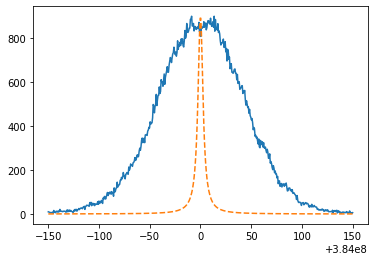

In [7]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 10 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 10000 #number of atoms

photons_absorbed = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption = lorentz(f_las, f_1, v_x)
        if np.random.rand() < prob_of_absorption:
            photons_absorbed[i] += 1
            energy_state = 1

theory = lorentz(freq_sweep, resonance_freq,0)*np.max(photons_absorbed)
plt.plot(freq_sweep,photons_absorbed)
plt.plot(freq_sweep, theory, '--')
plt.show()

Increase the tempature to `T=100` K.

How does the absorption peak change?  You may want to step `N` down the first time you try this.

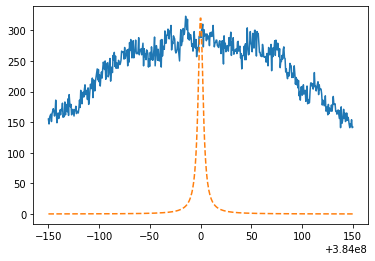

In [8]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 100 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 10000 #number of atoms

photons_absorbed = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption = lorentz(f_las, f_1, v_x)
        if np.random.rand() < prob_of_absorption:
            photons_absorbed[i] += 1
            energy_state = 1

theory = lorentz(freq_sweep, resonance_freq,0)*np.max(photons_absorbed)
plt.plot(freq_sweep,photons_absorbed)
plt.plot(freq_sweep, theory, '--')
plt.show()


**NB: Add in questions about exploring the temperature-dependent peak width**.

A second laser is added that counterpropagates with the original laser but is less powerful.  This has the affect that (1) if the first laser excites the atom then the second laser sees it in the excited state and can't get absorbed and (2) the velocity "observed" by the second laser is in the opposite direction. 

Add this in to your model.  Decrease N=1000 so it doesn't take forever to run, then pump it back up to 10000 once it's working.

For the moment, set the tempature back to `T=10` K.  This will allow us to see the signal using a smaller number of atoms.  In reality you'd have $\gg 10^{4}$ atoms in the rubidium cell, but this would slow the simuilation down too much.

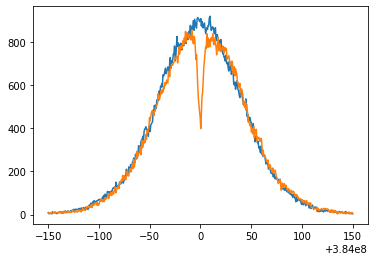

In [15]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 10 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

resonance_freq = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)



### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 10000 #number of atoms

photons_absorbed = np.zeros(num_steps)
photons_absorbed_second_laser = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption = lorentz(f_las, resonance_freq, v_x)
        prob_of_absorption_second_laser = lorentz(f_las, resonance_freq, -v_x)
        if np.random.rand() < prob_of_absorption:
            photons_absorbed[i] += 1
            energy_state = 1
        elif np.random.rand() < prob_of_absorption_second_laser:
            photons_absorbed_second_laser[i] += 1

theory = lorentz(freq_sweep, resonance_freq,0)*np.max(photons_absorbed)
plt.plot(freq_sweep,photons_absorbed)
plt.plot(freq_sweep,photons_absorbed_second_laser)
#plt.plot(freq_sweep, theory, '--')
plt.show()


Subtract the signals from the two lasers and plot that.

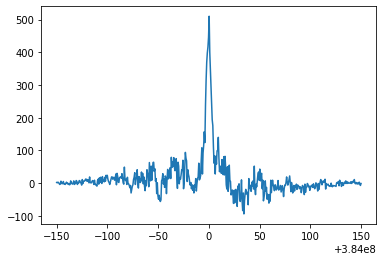

In [16]:
plt.plot(freq_sweep,photons_absorbed -photons_absorbed_second_laser)
plt.show()

For atoms in the $F=2$ state of the $5S_{1/2}$ ground state, there are three possible excited levels in the $5P_{3/2}$ state.  The $F^{'}=2$ level is $63$ MHz above the $F^{'}=1$ level and the $F^{'} = 3$ level is $121$ MHz above the $F^{'}=1$ level.   **NB: Check these numbers**

Take the transition from $F=2$ to $F^{'}=1$ to be $384E6$ MHz and determine the number of photons absorbed by the atoms.  Start off with `N=100` to debug your code, then up the number by factors of 10 to `N=10000` (which runs really slow).  Plot the difference in number of photons absorbed between the two lasers.

Does this plot look like anything you've seen in lab?

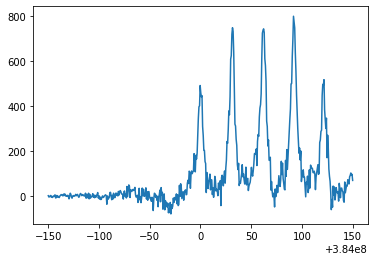

In [11]:
### Atom properties
m = 1.42E-25 #kg
k_B = 1.38E-23 # m^2 kg/(s^2 K)
T = 10 #K  - Gas temperature
sigma =np.sqrt(k_B*T/m)
mu=0

# Resonance frequencies
f_1 = 384E6  #MHz -(pay attention - we are working in MHz, not Hz)
f_2 = f_1 + 63
f_3 = f_1 + 121

delta_f = 6 #MHz  - Approx line width of Rb
c = 3E8  #m/s - speed of light in vacuum

### Laser sweep
f_1 = 384E6 #MHz  - Center of our sweep
f_start = f_1 - 25*delta_f
f_stop = f_1 + 25*delta_f
num_steps = 500
freq_sweep = np.linspace(f_start,f_stop, num_steps)


### Helper functions
def doppler_shift(vel, freq):
    shifted_freq = freq*(1+vel/c)
    return shifted_freq

alpha_0 =  1 #assume 100% absorption on resonance regardless of laser intensity
def lorentz(laser_freq,f_0,vel):
    f = doppler_shift(vel, laser_freq)
    P = alpha_0*1/(1+4*(f-f_0)**2/delta_f**2)
    return P

### Atoms in the laser beam
N = 10000 #number of atoms

photons_absorbed = np.zeros(num_steps)
photons_absorbed_second_laser = np.zeros(num_steps)


for atom in range(N):
    v_x = np.random.normal(mu, sigma)
    for i in range(num_steps):
        f_las = freq_sweep[i]
        prob_of_absorption1 = lorentz(f_las, f_1, v_x)
        prob_of_absorption_second_laser1 = lorentz(f_las, f_1, -v_x)
        prob_of_absorption2 = lorentz(f_las, f_2, v_x)
        prob_of_absorption_second_laser2 = lorentz(f_las, f_2, -v_x)
        prob_of_absorption3 = lorentz(f_las, f_3, v_x)
        prob_of_absorption_second_laser3 = lorentz(f_las, f_3, -v_x)
        if np.random.rand() < prob_of_absorption1 or np.random.rand() < prob_of_absorption2 or np.random.rand() < prob_of_absorption3:
            photons_absorbed[i] += 1
        elif np.random.rand() < prob_of_absorption_second_laser1 or np.random.rand() < prob_of_absorption_second_laser2 or np.random.rand() < prob_of_absorption_second_laser3:
            photons_absorbed_second_laser[i] += 1


plt.plot(freq_sweep,photons_absorbed - photons_absorbed_second_laser)
plt.show()


There are only three resonance frequencies so why do we get five peaks?

---

**Possible changes:**

* **Add in series of questions about temp dependent width of doppler peak**

* **Add in three frequencies _before_ adding second laser and explore what spectrum would look like at T=0 K and T=10 K**

* **Explore behavior more at room temperatures**

## Going Further

Here are some things for you to try:

* This code is highly inefficient and struggles when you hit N=10000.  Try finding out ways to speed the code up.
* Repeat this for $^{87}Rb$.
* Both $\alpha_0$ and $\Delta f$ are different for the different energy levels.  Try looking up this info and adding this in to the model.